# Background
- For independent study help
- use `scipy.integrate.ode`

# Imports

In [18]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# nicer plot formatting
def config_plots():
    #must run twice for some reason (glitch in Jupyter)
    for i in range(2):
        plt.rcParams['figure.figsize'] = [10, 8]
        plt.rcParams['axes.grid'] = True
        plt.rcParams['axes.axisbelow'] = True
        plt.rcParams['grid.linestyle'] = '--'
        plt.rcParams.update({'font.size': 18})
        
config_plots()

# Testing

## Scipy Example
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html

or

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

In [8]:
from scipy.integrate import solve_ivp

In [6]:
# exponential decay
def exponential_decay(t, y):
    return -0.5 * y

In [21]:
# t0=0, tf=10, y0=2,4
y0s = [2,4,8]
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])

In [13]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11487653,  1.26364188,  3.06061781,  4.85759374,
        6.65456967,  8.4515456 , 10.        ])
 t_events: None
        y: array([[2.        , 1.88836035, 1.06327177, 0.43319312, 0.17648948,
        0.0719045 , 0.02929499, 0.01350938],
       [4.        , 3.7767207 , 2.12654355, 0.86638624, 0.35297895,
        0.143809  , 0.05858998, 0.02701876],
       [8.        , 7.5534414 , 4.25308709, 1.73277247, 0.7059579 ,
        0.287618  , 0.11717996, 0.05403753]])

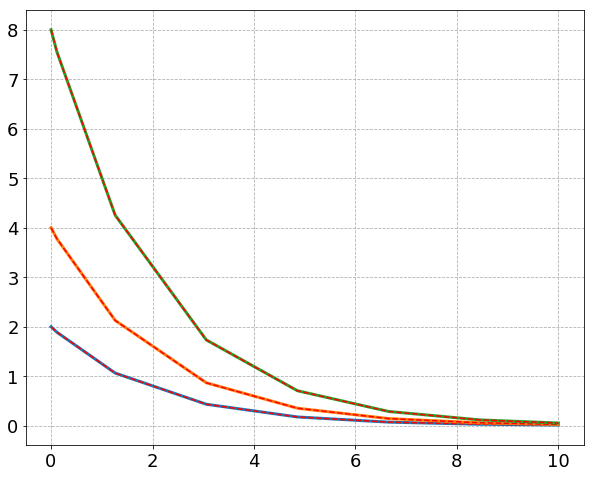

In [23]:
for i in [0,1,2]:
    plt.plot(sol.t, sol.y[i], linewidth=3);
    plt.plot(sol.t, y0s[i]*np.exp(-0.5*sol.t), linestyle='--', c='red')

In [35]:
# cannon
def upward_cannon(t, y): return [y[1], -0.5]
def hit_ground(t, y): return y[0]
hit_ground.terminal = True
hit_ground.direction = -1

In [48]:
sol = solve_ivp(upward_cannon, [0, 100], [0, 10], events=hit_ground, t_eval=np.linspace(0,100, 100))

In [49]:
sol

  message: 'A termination event occurred.'
     nfev: 44
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([ 0.        ,  1.01010101,  2.02020202,  3.03030303,  4.04040404,
        5.05050505,  6.06060606,  7.07070707,  8.08080808,  9.09090909,
       10.1010101 , 11.11111111, 12.12121212, 13.13131313, 14.14141414,
       15.15151515, 16.16161616, 17.17171717, 18.18181818, 19.19191919,
       20.2020202 , 21.21212121, 22.22222222, 23.23232323, 24.24242424,
       25.25252525, 26.26262626, 27.27272727, 28.28282828, 29.29292929,
       30.3030303 , 31.31313131, 32.32323232, 33.33333333, 34.34343434,
       35.35353535, 36.36363636, 37.37373737, 38.38383838, 39.39393939])
 t_events: [array([40.])]
        y: array([[ 0.        ,  9.84593409, 19.18171615, 28.00734619, 36.3228242 ,
        44.12815019, 51.42332415, 58.20834609, 64.483216  , 70.24793388,
        75.50249974, 80.24691358, 84.48117539, 88.20528517, 91.41924293,
        94.12304867, 96.3167

In [50]:
ts = np.linspace(0, 40, 100)

In [51]:
ys = 10*ts - 1/2 * 0.5 * ts**2

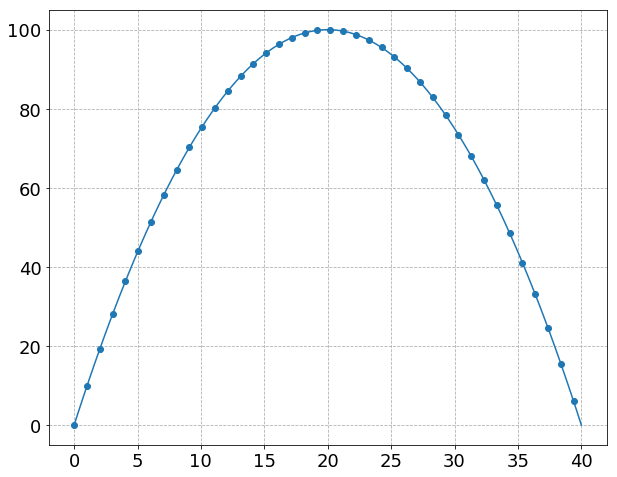

In [53]:
plt.scatter(sol.t, sol.y[0])
plt.plot(ts, ys)

In [31]:
hit_ground(0, [0,0])

0

## Try swimmer

In [90]:
q = 1.6e-19 # C
me = 9.1e-31 # kg
#qom = q/me
qom = 1
B0 = 1 # tesla
v0 = 100 # m / s
theta0 = np.pi/2 # rad

#vtrans = v0 * np.sin(theta0)
#vz = v0*np.cos(theta0)

state_0 = [0,0,0,0,100,100] # [pos, v]

In [91]:
def fun(t, state):
    x,y,z = state[:3]
    vx,vy,vz = state[3:]
    f = [vx, vy, vz, qom*B0*vy, -qom*B0*vx, 0]
    return f

In [97]:
sol = solve_ivp(fun, [0, 20], state_0, t_eval=np.linspace(0,20, 600))#, events=hit_ground, t_eval=np.linspace(0,100, 100))

In [98]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 176
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.03338898,  0.06677796,  0.10016694,  0.13355593,
        0.16694491,  0.20033389,  0.23372287,  0.26711185,  0.30050083,
        0.33388982,  0.3672788 ,  0.40066778,  0.43405676,  0.46744574,
        0.50083472,  0.53422371,  0.56761269,  0.60100167,  0.63439065,
        0.66777963,  0.70116861,  0.7345576 ,  0.76794658,  0.80133556,
        0.83472454,  0.86811352,  0.9015025 ,  0.93489149,  0.96828047,
        1.00166945,  1.03505843,  1.06844741,  1.10183639,  1.13522538,
        1.16861436,  1.20200334,  1.23539232,  1.2687813 ,  1.30217028,
        1.33555927,  1.36894825,  1.40233723,  1.43572621,  1.46911519,
        1.50250417,  1.53589316,  1.56928214,  1.60267112,  1.6360601 ,
        1.66944908,  1.70283806,  1.73622705,  1.76961603,  1.80300501,
        1.83639399,  1.869782

In [99]:
X,Y,Z = sol.y[0:3]

In [100]:
from mpl_toolkits.mplot3d import Axes3D

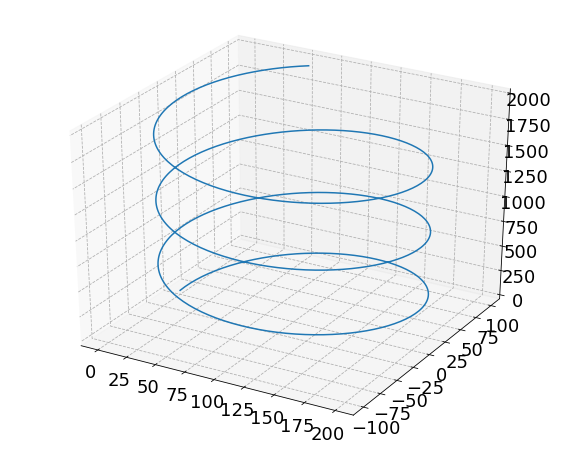

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X,Y,Z);

In [108]:
R = (X.max() - X.min()) / 2
R

100.04954887549866

In [102]:
# NO
R = np.sqrt(X**2+Y**2)

In [103]:
R

array([  0.        ,   3.33874317,   6.67655568,  10.01252516,
        13.3459764 ,  16.67592519,  20.00129812,  23.32106223,
        26.63422117,  29.93981109,  33.23689644,  36.52456561,
        39.80192647,  43.06810174,  46.32222432,  49.56343252,
        52.79086519,  56.00365686,  59.20093276,  62.38180386,
        65.54536191,  68.69067446,  71.81679026,  74.92370112,
        78.01084211,  81.07696523,  84.12088568,  87.14147988,
        90.13768317,  93.10848723,  96.05293717,  98.97012832,
       101.85920276, 104.71934555, 107.54978072, 110.34976698,
       113.11859325, 115.85557387, 118.56004372, 121.231353  ,
       123.86886195, 126.47193531, 129.03993667, 131.57222264,
       134.06813696, 136.52700438, 138.94812458, 141.33076595,
       143.67415929, 145.97749151, 148.23989931, 150.46072273,
       152.64110863, 154.78048127, 156.87782764, 158.93218555,
       160.94264482, 162.90834818, 164.82849162, 166.70232451,
       168.5291492 , 170.30832035, 172.03924377, 173.72

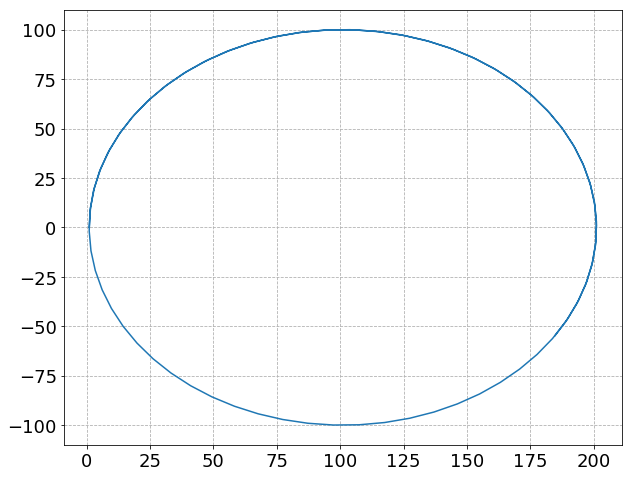

In [72]:
plt.plot(X,Y)

In [ ]:
plt.scatter(sol.t, sol.y[0])
plt.plot(ts, ys)